In [1]:
import numpy as np
import tensorflow as tf
from keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D
from keras.models import Sequential
from keras.datasets import mnist
from keras.callbacks import ModelCheckpoint,EarlyStopping
import keras
import pandas as pd

Using TensorFlow backend.


In [2]:
# ResNet on CIFER10 dataset
inputs = keras.Input(shape=(32,32,3),name='img')
x = Conv2D(32,3,activation='relu')(inputs)
x = Conv2D(64,3,activation='relu')(x)
block_1_output = layers.MaxPool2D(3)(x)

x = Conv2D(64,3,activation='relu',padding='same')(block_1_output)
x = Conv2D(64,3,activation='relu',padding='same')(x)
block_2_output = layers.add([x,block_1_output])

x = Conv2D(64,3,activation='relu',padding='same')(block_2_output)
x = Conv2D(64,3,activation='relu',padding='same')(x)
block_3_output = layers.add([x,block_2_output])

x = Conv2D(64,3,activation='relu',padding='same')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = Dense(256,activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = Dense(10)(x)
model = keras.Model(inputs,outputs,name='toy_resnet')
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_2[0][0]                   
_________________________________________________________________________________________

In [9]:
# Data preprocessing
(xtrain,ytrain),(xtest,ytest) = keras.datasets.cifar10.load_data()
print(xtrain.shape)
print(xtest.shape)
xtrain = xtrain/255
xtest = xtest/255
ytrain = keras.utils.to_categorical(ytrain,10)
ytest = keras.utils.to_categorical(ytest,10)

# Train the model
model.compile(optimizer=keras.optimizers.Adam(1e-2), loss=keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['acc'])
history = model.fit(xtrain[:1000],ytrain[:1000],epochs=50,validation_data=(xtest[:1000],ytest[:1000]),batch_size=128)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 4s 4ms/step - loss: 23.7220 - acc: 0.1690 - val_loss: 2.3045 - val_acc: 0.0920
Epoch 2/50
1000/1000 [==============================] - 4s 4ms/step - loss: 2.2971 - acc: 0.1140 - val_loss: 2.2827 - val_acc: 0.1240
Epoch 3/50
1000/1000 [==============================] - 3s 3ms/step - loss: 2.2798 - acc: 0.1130 - val_loss: 2.3054 - val_acc: 0.1150
Epoch 4/50
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3050 - acc: 0.1120 - val_loss: 2.3033 - val_acc: 0.1120
Epoch 5/50
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3066 - acc: 0.0850 - val_loss: 2.3023 - val_acc: 0.1030
Epoch 6/50
1000/1000 [==============================] - 4s 4ms/step - loss: 2.3026 - acc: 0.0860 - val_loss: 2.3019 - val_acc: 0.1120
Epoch 7/50
1000/1000 [==============================] - 3s 3ms/step - loss: 2.3017 - acc: 0.1130 - val_loss: 

In [10]:
# Save the model
model.save('resnet_model')

# load the model
model = keras.models.load_model('resnet_model')

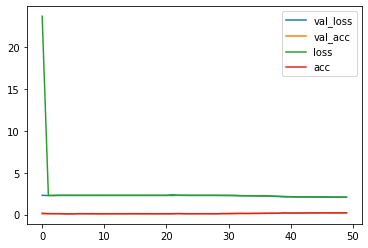

In [11]:
pd.DataFrame(history.history).plot()